In [2]:
# Import all the necessary packages.
import pandas as pd
import numpy as np



In [3]:
# Read the provided CSV file/data set.
df = pd.read_csv('customer_data.csv') 

# Print the output.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Edu            41188 non-null  object 
 2   Comm           41188 non-null  object 
 3   Duration       41188 non-null  int64  
 4   Campaign       41188 non-null  int64  
 5   PosDays        41188 non-null  int64  
 6   Last_out       41188 non-null  object 
 7   Var_rate       41188 non-null  float64
 8   Price_idx      41188 non-null  float64
 9   Conf_idx       41188 non-null  float64
 10  Month_rate     41188 non-null  float64
 11  Quarterly_emp  41188 non-null  float64
 12  Target         41188 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 4.1+ MB
None


,Age,Edu,Comm,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,basic.4y,cellular,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,unknown,cellular,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,university.degree,cellular,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,high.school,cellular,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,basic.4y,cellular,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
# Specify the DataFrame column, and add/determine the values.
df['Edu'].value_counts() 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [5]:
# Create two lists: one with initial and one with new values.
intial_vals = ['illiterate', 'unknown', 'basic',
               'high', 'university', 'professional']

new_vals = ['other', 'other', 'pre-school',
            'high-school', 'uni', 'masters']

# Create a for loop to replace the values.
for old_val, new_val in zip(intial_vals, new_vals):
    df.loc[df['Edu'].str.contains(old_val),'Edu' ] = new_val
# Specify the DataFrame column, and add/determine the values.
# Display all the unique values/check changes.
df['Edu'].unique()df['Edu'].value_counts() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [6]:
# Specify the DataFrame column, and add/determine the values.
df['Edu'].value_counts() 

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

In [10]:
#The order of the Edu column is meaningful and the order matters, so apply LabelEncoder to this column. 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np



In [13]:
# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d (y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self


In [14]:
# Order lists of the values for the Edu column.
Edu_order = ['other', 'pre-school', 'high-school', 'uni', 'masters']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
df['Edu'] = df['Edu'].apply(lambda x: x if x in Edu_order else 'other')
df['Edu'] = le.transform(df['Edu'])

# View the DataFrame
print(df.head())

NameError: name 'column_or_1d' is not defined

In [15]:
# Create dummy variables for 'Comm' column
comm_dummies = pd.get_dummies(df['Comm'], prefix='Comm', drop_first = True)
df = pd.concat([df, comm_dummies.astype(int)], axis=1)

# Create dummy variables for 'Last_out' column
last_out_dummies = pd.get_dummies(df['Last_out'], prefix='Last_out', drop_first = True)

# Join the new columns to the DataFrame.
df = pd.concat([df, last_out_dummies.astype(int)], axis=1)

# Drop the original string columns
df.drop(['Comm', 'Last_out'], axis=1, inplace=True)

# View the updated DataFrame
print(df.head())

   Age          Edu  Duration  Campaign  PosDays  Var_rate  Price_idx  \
0   44   pre-school       210         1      999       1.4     93.444   
1   53        other       138         1      999      -0.1     93.200   
2   28          uni       339         3        6      -1.7     94.055   
3   39  high-school       185         2      999      -1.8     93.075   
4   55   pre-school       137         1        3      -2.9     92.201   

   Conf_idx  Month_rate  Quarterly_emp  Target  Comm_telephone  \
0     -36.1       4.963         5228.1       0               0   
1     -42.0       4.021         5195.8       0               0   
2     -39.8       0.729         4991.6       1               0   
3     -47.1       1.405         5099.1       0               0   
4     -31.4       0.869         5076.2       1               0   

   Last_out_nonexistent  Last_out_success  
0                     1                 0  
1                     1                 0  
2                     0         

In [16]:
# Set the variables.
X = df.drop('Target', axis = 1)
y = df['Target']

# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data.sort_values('VIF',ascending=True)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [17]:
# Drop the columns with VIF > 10 to avoid multicollinearity problems.
X = X.drop(['Last_out_success', 'Last_out_nonexistent', 'Age', 'Var_rate', 'PosDays', 'Conf_idx',
              'Month_rate', 'Price_idx', 'Quarterly_emp'],
             axis = 1)

# View the DataFrame.
print(X.shape)
X.head()

(41188, 4)


,Edu,Duration,Campaign,Comm_telephone
0,pre-school,210,1,0
1,other,138,1,0
2,uni,339,3,0
3,high-school,185,2,0
4,pre-school,137,1,0


In [18]:
# Recalculate VIF after removal of columns.
# VIF dataframe.
vif_data2 = pd.DataFrame()
vif_data2['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data2['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data2.sort_values('VIF',ascending=True)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [19]:
# Determine whether values in a column are balanced.
df['Target'].value_counts()  

0    36548
1     4640
Name: Target, dtype: int64

Text(0.5, 1.0, 'Target Imbalance')

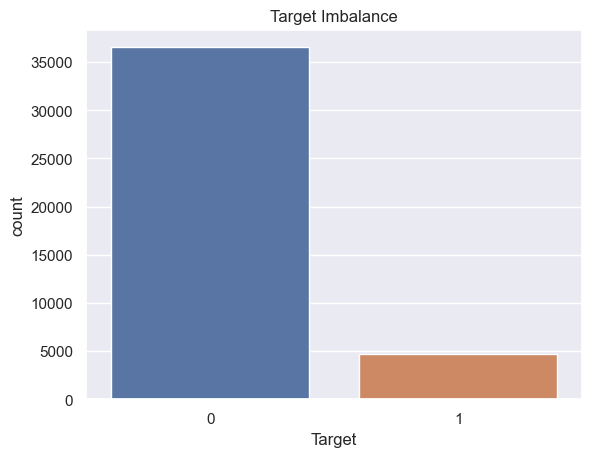

In [20]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Target', data=df)
ax.set_title('Target Imbalance')

In [21]:
# Handles unbalanced data (scikit-learn needed)
!pip install imblearn  

# Optimised linear, algebra, integrations (scientific)
!pip install scipy  

# Simple tools for predictive data analytics
!pip install scikit-learn  

# Oversampling technique; creates new samples from data
!pip install SMOTE 

     -------------------------------------- 226.0/226.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [22]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

ValueError: could not convert string to float: 'pre-school'

In [23]:
# Determine whether values in a column are balanced by counting the values.
os_data_y['Target'].value_counts()

NameError: name 'os_data_y' is not defined

In [24]:
sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Target', data = os_data_y)
ax.set_title("New Balanced Target")

NameError: name 'os_data_y' is not defined

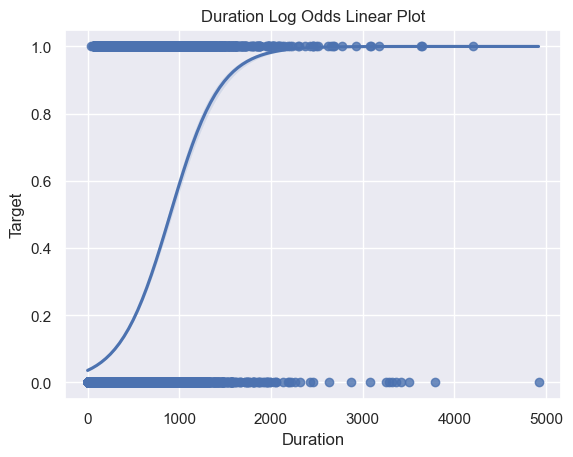

In [25]:
dur = sns.regplot(x = 'Duration',
                  y= 'Target',
                  data= df,
                  logistic= True).set_title("Duration Log Odds Linear Plot")

In [26]:
# Name the new DataFrame, and specify all the columns for BLR.
nec_cols = nec_cols = os_data_X.columns

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Target']  

# Set the logit() to accept y and X as parameters, and return the logit object.
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()  

# Print the results.
result.summary()

NameError: name 'os_data_X' is not defined

In [27]:
# Import the necessary packages.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Set LogisticRegression() to logreg.
logreg = LogisticRegression(max_iter=1000) 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(os_data_X, os_data_y.values.ravel()) 

NameError: name 'os_data_X' is not defined

In [28]:
# Determine BLR model's accuracy.
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(acc))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
# Create the confusion matrix to test classification accuracy in BLR.
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

NameError: name 'y_pred' is not defined

In [30]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix, index=['observed_notchurn','observed_churn'],
columns=['predicted_notchurn', 'predicted_churn'])

,predicted_notchurn,predicted_churn
observed_notchurn,<function confusion_matrix at 0x00000140ECF46940>,<function confusion_matrix at 0x00000140ECF46940>
observed_churn,<function confusion_matrix at 0x00000140ECF46940>,<function confusion_matrix at 0x00000140ECF46940>


In [31]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

NameError: name 'y_pred' is not defined